#Submitted By:
###Devansh Tripathi (25565003)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Sex'].value_counts()

,count
Sex,
M,725
F,193


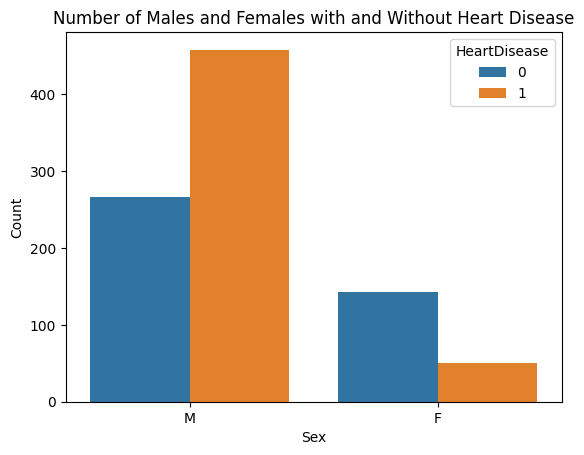

In [8]:
sns.countplot(x='Sex', hue='HeartDisease', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Males and Females with and Without Heart Disease')
plt.show()

In [9]:
df['Sex']=df['Sex'].map({'M':1,'F':0})

In [10]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [11]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [12]:
df['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [13]:
df_cleaned=df.copy()

In [14]:
df_cleaned=pd.get_dummies(columns=['RestingECG'],data=df_cleaned,dtype=int)

In [15]:
df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,ATA,140,289,0,172,N,0.0,Up,0,0,1,0
1,49,0,NAP,160,180,0,156,N,1.0,Flat,1,0,1,0
2,37,1,ATA,130,283,0,98,N,0.0,Up,0,0,0,1
3,48,0,ASY,138,214,0,108,Y,1.5,Flat,1,0,1,0
4,54,1,NAP,150,195,0,122,N,0.0,Up,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,132,N,1.2,Flat,1,0,1,0
914,68,1,ASY,144,193,1,141,N,3.4,Flat,1,0,1,0
915,57,1,ASY,130,131,0,115,Y,1.2,Flat,1,0,1,0
916,57,0,ATA,130,236,0,174,N,0.0,Flat,1,1,0,0


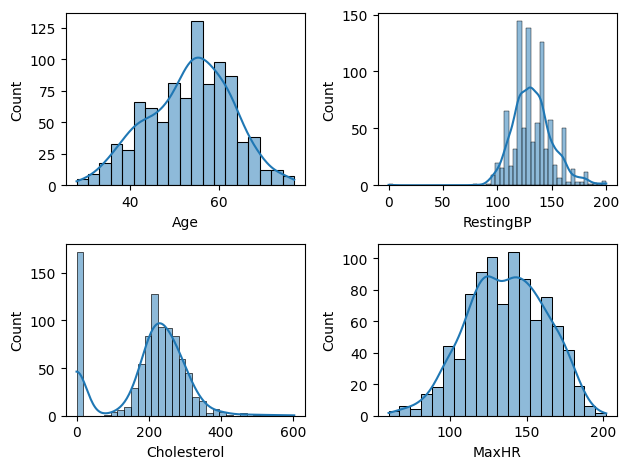

In [16]:
num_col=['Age','RestingBP','Cholesterol','MaxHR']
i=1
for col in num_col:

  plt.subplot(2,2,i)
  sns.histplot(df[col],kde=True)

  i+=1
plt.tight_layout()



Cholestrol does not have Normal Distribution due to high number of 0 present in it. So we can replace it with mean of non zero cholestrol

In [17]:


chl_mean=df_cleaned.loc[df_cleaned['Cholesterol']!=0,'Cholesterol'].mean().round(2)

df_cleaned['Cholesterol']=df_cleaned['Cholesterol'].replace(0,chl_mean)

In [18]:
rbp_mean=df_cleaned.loc[df_cleaned['RestingBP']!=0,'RestingBP'].mean().round(2)

df_cleaned['RestingBP']=df_cleaned['RestingBP'].replace(0,rbp_mean)

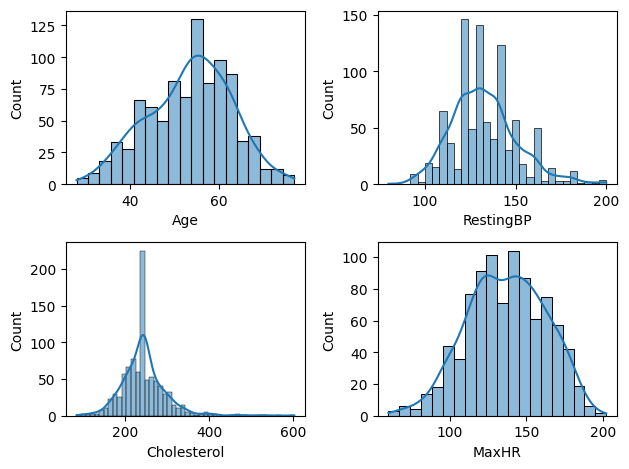

In [19]:
num_col=['Age','RestingBP','Cholesterol','MaxHR']
i=1
for col in num_col:

  plt.subplot(2,2,i)
  sns.histplot(df_cleaned[col],kde=True)

  i+=1
plt.tight_layout()

<Axes: xlabel='ChestPainType', ylabel='count'>

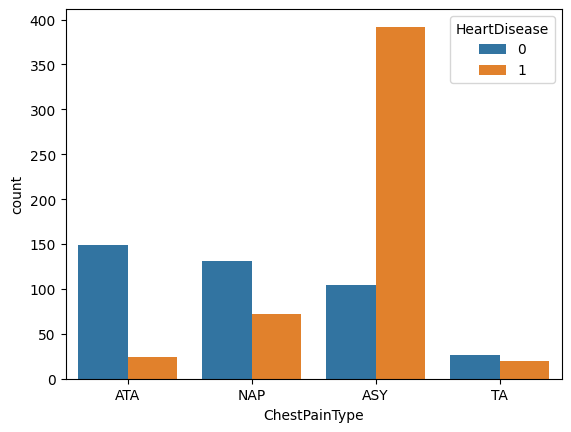

In [20]:
sns.countplot(df_cleaned,x='ChestPainType',hue='HeartDisease')

{'whiskers': [<matplotlib.lines.Line2D at 0x7d2405d7ff50>,
 'caps': [<matplotlib.lines.Line2D at 0x7d2405bad1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d2405d7c920>],
 'medians': [<matplotlib.lines.Line2D at 0x7d2405bad7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d2405bada90>],
 'means': []}

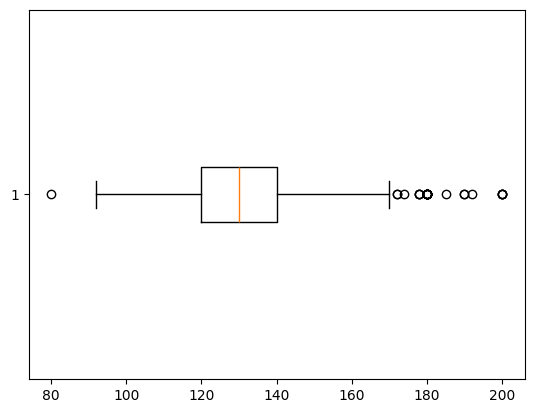

In [21]:
plt.boxplot(df_cleaned['RestingBP'],vert=False)

<Axes: >

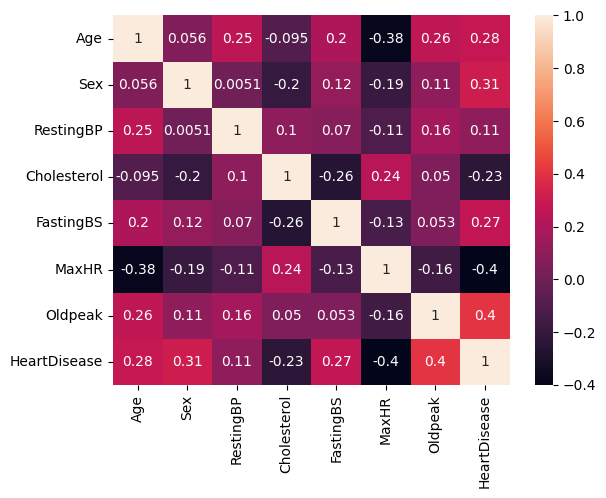

In [22]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#Data Preprocessing

In [23]:
df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,ATA,140.0,289.0,0,172,N,0.0,Up,0,0,1,0
1,49,0,NAP,160.0,180.0,0,156,N,1.0,Flat,1,0,1,0
2,37,1,ATA,130.0,283.0,0,98,N,0.0,Up,0,0,0,1
3,48,0,ASY,138.0,214.0,0,108,Y,1.5,Flat,1,0,1,0
4,54,1,NAP,150.0,195.0,0,122,N,0.0,Up,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110.0,264.0,0,132,N,1.2,Flat,1,0,1,0
914,68,1,ASY,144.0,193.0,1,141,N,3.4,Flat,1,0,1,0
915,57,1,ASY,130.0,131.0,0,115,Y,1.2,Flat,1,0,1,0
916,57,0,ATA,130.0,236.0,0,174,N,0.0,Flat,1,1,0,0


In [24]:
df_cleaned=pd.get_dummies(df_cleaned,dtype=int)

In [25]:
df_cleaned

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172,0.0,0,0,1,0,0,1,0,0,1,0,0,0,1
1,49,0,160.0,180.0,0,156,1.0,1,0,1,0,0,0,1,0,1,0,0,1,0
2,37,1,130.0,283.0,0,98,0.0,0,0,0,1,0,1,0,0,1,0,0,0,1
3,48,0,138.0,214.0,0,108,1.5,1,0,1,0,1,0,0,0,0,1,0,1,0
4,54,1,150.0,195.0,0,122,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110.0,264.0,0,132,1.2,1,0,1,0,0,0,0,1,1,0,0,1,0
914,68,1,144.0,193.0,1,141,3.4,1,0,1,0,1,0,0,0,1,0,0,1,0
915,57,1,130.0,131.0,0,115,1.2,1,0,1,0,1,0,0,0,0,1,0,1,0
916,57,0,130.0,236.0,0,174,0.0,1,1,0,0,0,1,0,0,1,0,0,1,0


In [26]:
df_cleaned.drop(columns='ExerciseAngina_N',inplace=True,axis=1)

In [27]:
scaling_col=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_cleaned[scaling_col]=scaler.fit_transform(df_cleaned[scaling_col])

In [28]:
df_cleaned.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.414853,0.832513,0,1.382928,-0.832432,0,0,1,0,0,1,0,0,0,0,0,1
1,-0.478484,0,1.527192,-1.212938,0,0.754157,0.105664,1,0,1,0,0,0,1,0,0,0,1,0
2,-1.751359,1,-0.141317,0.719919,0,-1.525138,-0.832432,0,0,0,1,0,1,0,0,0,0,0,1
3,-0.584556,0,0.303619,-0.574908,0,-1.132156,0.574711,1,0,1,0,1,0,0,0,1,0,1,0
4,0.051881,1,0.971022,-0.931454,0,-0.581981,-0.832432,0,0,1,0,0,0,1,0,0,0,0,1


In [29]:
df_cleaned.shape

(918, 19)

#Data Modelling


In [30]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score


In [31]:
y=df_cleaned['HeartDisease']
X=df_cleaned.drop(columns='HeartDisease')


In [32]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.414853,0.832513,0,1.382928,-0.832432,0,1,0,0,1,0,0,0,0,0,1
1,-0.478484,0,1.527192,-1.212938,0,0.754157,0.105664,0,1,0,0,0,1,0,0,0,1,0
2,-1.751359,1,-0.141317,0.719919,0,-1.525138,-0.832432,0,0,1,0,1,0,0,0,0,0,1
3,-0.584556,0,0.303619,-0.574908,0,-1.132156,0.574711,0,1,0,1,0,0,0,1,0,1,0
4,0.051881,1,0.971022,-0.931454,0,-0.581981,-0.832432,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.253656,0.363372,0,-0.188999,0.293283,0,1,0,0,0,0,1,0,0,1,0
914,1.536902,1,0.637321,-0.968986,1,0.164684,2.357094,0,1,0,1,0,0,0,0,0,1,0
915,0.370100,1,-0.141317,-2.132453,0,-0.857069,0.293283,0,1,0,1,0,0,0,1,0,1,0
916,0.370100,0,-0.141317,-0.162065,0,1.461525,-0.832432,1,0,0,0,1,0,0,0,0,1,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

I will use 4 models for classification

1.   Logistic Regression
2.   k-nearest neighbors
3. Support Vector Machine
4. RandomForest



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [35]:
models={'LogisticRegression':LogisticRegression(),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'SVC':SVC(),
        'RandomForestClassifier':RandomForestClassifier()}


In [36]:
result=[]
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  result.append({'Model':name,'Accuracy':acc,'F1-Score':f1})


In [37]:
for i in result:
  print(i)

{'Model': 'LogisticRegression', 'Accuracy': 0.8695652173913043, 'F1-Score': 0.8846153846153846}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8695652173913043, 'F1-Score': 0.8857142857142857}
{'Model': 'SVC', 'Accuracy': 0.8586956521739131, 'F1-Score': 0.8761904761904762}
{'Model': 'RandomForestClassifier', 'Accuracy': 0.8804347826086957, 'F1-Score': 0.8942307692307693}


#HyperParameter Tuning

## Hyperparameter tuning for logistic regression


Define a grid of hyperparameters for Logistic Regression and use GridSearchCV to find the best parameters.


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for Logistic Regression: ", grid_search.best_params_)

Best parameters for Logistic Regression:  {'C': 10, 'penalty': 'l2'}


In [39]:
y_pred = grid_search.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8641304347826086
F1-Score:  0.8792270531400966
Confusion Matrix: 
 [[68  9]
 [16 91]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



## Hyperparameter tuning for k-nearest neighbors




In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

print("Best parameters for KNeighborsClassifier: ", grid_search_knn.best_params_)

Best parameters for KNeighborsClassifier:  {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


In [41]:
y_pred = grid_search_knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8641304347826086
F1-Score:  0.8803827751196173
Confusion Matrix: 
 [[67 10]
 [15 92]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



## Hyperparameter tuning for support vector machine



In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

grid_search_svc = GridSearchCV(SVC(), param_grid, cv=5)
grid_search_svc.fit(X_train, y_train)

print("Best parameters for SVC: ", grid_search_svc.best_params_)

Best parameters for SVC:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [43]:
y_pred = grid_search_svc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.8586956521739131
F1-Score:  0.8761904761904762
Confusion Matrix: 
 [[66 11]
 [15 92]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## Hyperparameter tuning for RandomForest



In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for RandomForestClassifier: ", grid_search_rf.best_params_)

Best parameters for RandomForestClassifier:  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [45]:
y_pred = grid_search_rf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.875
F1-Score:  0.8899521531100478
Confusion Matrix: 
 [[68  9]
 [14 93]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [48]:
import xgboost as xgb
xg_model=xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xg_model.fit(X_train, y_train)
y_pred = xg_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy:  0.8532608695652174
F1-Score:  0.8695652173913043
Confusion Matrix: 
 [[67 10]
 [17 90]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



#We can see F1 Score of RandomForest Classifier is heighest, So we will choose this model for our Dataset

In [46]:
import joblib as pk
pk.dump(grid_search_rf,'heart_disease_model.pkl')
pk.dump(X.columns.to_list(),'columns.pkl')
pk.dump(scaler,'scaler.pkl')

['scaler.pkl']